# Homework 2: Data Analysis and Visualization

**Course:** Statistical Data Processing  
**Date:** 19/11/2024  

---

## Table of Contents

1. <a href="#working-with-tables-apartment-prices">Working with Tables: Apartment Prices</a>
    - <a href="#calculating-price-per-square-meter-ppsqm">1.1 Calculating Price per Square Meter (ppsqm)</a>
    - <a href="#ranking-top-5-most-expensive-apartments">1.2 Ranking Top 5 Most Expensive Apartments</a>
    - <a href="#average-ppsqm-in-ekhagen">1.3 Average ppsqm in Ekhagen</a>
    - <a href="#interesting-data-aspect">1.4 Interesting Data Aspect</a>
2. <a href="#the-swedish-election-of-2018">The Swedish Election of 2018</a>
    - <a href="#total-legitimate-votes-in-stockholm">1.1 Total Legitimate Votes in Stockholm</a>
    - <a href="#municipality-with-highest-social-democratic-voting-percentage">1.2 Municipality with Highest Social Democratic Voting Percentage</a>
    - <a href="#top-3-municipalities-with-highest-participation">1.3 Top 3 Municipalities with Highest Participation</a>
3. <a href="#predicting-strokes">Predicting Strokes</a>
    - <a href="#hypertension-and-stroke-cases">3.1 Hypertension and stroke cases</a>
    - <a href="#conclusion-from-data-visualization">3.2 Conclusion from Data Visualization</a>
---

## <a id="working-with-tables-apartment-prices">1. Working with Tables: Apartment Prices</a>
We will analyze the dataset on apartment sales in Ekhagen to uncover insights into housing prices. Specifically, we calculate the price per square meter (ppsqm) for each apartment, rank the top 5 most expensive apartments based on ppsqm, and compute the average ppsqm in the area. Additionally, we highlight an interesting finding about the relationship between apartment size and ppsqm. Firstly we'll read in the our dataset. 

In [240]:
# Import necessary libraries
import pandas as pd

# Read the data from the provided URL or local file path
url = "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head(3)

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
0,3995000,4467.0,73.0,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,3820000,...,59.371033,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/
1,1995000,1773.0,36.0,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,2355000,...,59.371242,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
2,5100000,3839.0,81.0,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,6110000,...,59.371617,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/



### <a id="calculating-price-per-square-meter-ppsqm">1.1 Calculating Price per Square Meter (ppsqm)</a>

A new variable ppsqm is added to the dataset by dividing the apartment price by its area. Then we show it in a table format with only a select number of relevant columns. 

In [252]:
# Calculate price per square meter
df["ppsqm"] = df["soldPrice"] // df["livingArea"]

# Display the updated DataFrame relevant columns for presentation
cleaned_df = df[["location.address.streetAddress", "soldPrice", "livingArea", "ppsqm"]]
cleaned_df.head(3)

,location.address.streetAddress,soldPrice,livingArea,ppsqm
0,Åminnevägen 19,3820000,73.0,52328.0
1,Docentbacken 9,2355000,36.0,65416.0
2,Ekhagsvägen 5,6110000,81.0,75432.0


### <a id="ranking-top-5-most-expensive-apartments">1.2 Ranking Top 5 Most Expensive Apartments</a>
Ranking the top 5 most expensive apartment in Ekhagen by price per square meter (ppsqm) and displaying them in a table.

In [253]:
# Sort the DataFrame by ppsqm in descending order
top5_ppsqm = df.sort_values(by="ppsqm", ascending=False)

# Select relevant columns for presentation
top5_ppsqm = top5_ppsqm[["location.address.streetAddress", "soldPrice","livingArea", "ppsqm"]]

# Display the top 5 most expensive apartments
top5_ppsqm.head(5)

,location.address.streetAddress,soldPrice,livingArea,ppsqm
67,Ekhagsvägen 8,2500000,24.0,104166.0
50,Ekhagsvägen 8,2450000,24.0,102083.0
54,Ekhagsvägen 10,2300000,23.0,100000.0
34,Torphagsvägen 4,2210000,25.0,88400.0
55,Docentbacken 1B,2300000,26.9,85501.0


### <a id ="average-ppsqm-in-ekhagen">1.3 Average ppsqm in Ekhagen</a>
Calculating the average ppsqm across all apartments in Ekhagen with the mean of our previously added variable.

In [254]:
# Calculate the average ppsqm
average_ppsqm = df["ppsqm"].mean()

print(f"The average price per square meter in Ekhagen is {average_ppsqm:.2f} SEK.")

The average price per square meter in Ekhagen is 58758.93 SEK.


### <a id = "interesting-data-aspect" >1.4 Interesting Data Aspect </a>

We rank the top 8 apartment by smallest living area and show it in a table.

In [255]:
# Sorting the DataFrame by livingArea in ascending order
apa_area = df.sort_values(by="livingArea", ascending=True)

# Selecting relevant data
apa_area = apa_area[["location.address.streetAddress", "soldPrice","livingArea", "ppsqm"]]
apa_area.head(8)

,location.address.streetAddress,soldPrice,livingArea,ppsqm
150,Ekhagsvägen 10,1300000,20.0,65000.0
155,Åminnevägen 17,1450000,23.0,63043.0
54,Ekhagsvägen 10,2300000,23.0,100000.0
50,Ekhagsvägen 8,2450000,24.0,102083.0
67,Ekhagsvägen 8,2500000,24.0,104166.0
34,Torphagsvägen 4,2210000,25.0,88400.0
153,Ekhagsvägen 12,1475000,26.0,56730.0
55,Docentbacken 1B,2300000,26.9,85501.0


We see that all of the most expensive locations by apartment price per square meter also rank within the top eight for smallest living areas. This is intriguing, as it aligns with our intuitive understanding that larger apartments generally have a lower price per square meter, making the reverse true in this case as well.


## <a id="the-swedish-election-of-2018">2. The Swedish Election of 2018</a>

We will analyze voting data from the 2018 Swedish election to draw insights into electoral patterns in Stockholm municipalities. Specifically, we calculate the total number of legitimate votes (Giltiga Röster) in Stockholm, identify the municipality where the Social Democratic Party (S) garnered the highest percentage of votes, and rank the top 3 municipalities with the highest voter participation (valdeltagande).

In [258]:
# Read the election data
election_url = "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv"
# Assuming the CSV uses ';' as delimiter and ',' as decimal
election_df = pd.read_csv(election_url, delimiter=";", decimal=",")

# Display the first few rows of the dataset
election_df.head(3)

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
0,1,14,Stockholms län,Upplands Väsby,23.11,6.26,5.66,6.71,26.97,8.01,...,NaN,NaN,NaN,0.04,0.69,0.06,25830,26036,30740,84.70
1,1,15,Stockholms län,Vallentuna,28.29,10.11,7.73,7.58,18.91,4.47,...,0.0,NaN,0.00,0.02,0.59,0.08,20952,21099,23438,90.02
2,1,17,Stockholms län,Österåker,29.68,9.35,7.48,7.13,19.71,4.97,...,NaN,NaN,0.01,0.03,0.69,0.13,27711,27947,31309,89.26


### <a id = "total-legitimate-votes-in-stockholm"> 1.1 Total Legitimate Votes in Stockholm</a>
Calculating the total number of legitimate votes in Stockholm.

In [259]:
#Filtering for Stockholm region
filtered_election_df = election_df.loc[election_df["LÄNSNAMN"] == "Stockholms län"]

# Calculate the total number of legitimate votes in Stockholm
total_votes_stockholm = filtered_election_df["RÖSTER GILTIGA"].sum()

print(f"Total legitimate votes in Stockholm: {total_votes_stockholm}")

Total legitimate votes in Stockholm: 1426237


### <a id="municipality-with-highest-social-democratic-voting-percentage">1.2 Municipality with Highest Social Democratic Voting Percentage</a>


Identifying which municipality had the highest percentage of votes for the Social Democratic Party.

In [264]:
# Find the municipality with the highest Social Democratic voting percentage
top_social_dem = election_df.loc[election_df['S'].idxmax()]

print(f"Municipality with highest Social Democratic voting percentage: {top_social_dem['KOMMUNNAMN']} ({top_social_dem['S']}%).")

Municipality with highest Social Democratic voting percentage: Munkfors (52.18%).


### <a id="top-3-municipalities-with-highest-participation">1.3 Top 3 Municipalities with Highest Participation</a>

Ranking the top 3 municipalities based on voter participation (Valdeltagande (%)) and presenting this in a table. 

In [266]:
# Sort the DataFrame by Valdeltagande in descending order
top3_participation = election_df.sort_values("VALDELTAGANDE", ascending=False)

# Select relevant columns
top3_participation = top3_participation[["KOMMUNNAMN", "VALDELTAGANDE"]]

# Display the top 3
top3_participation.head(3)

,KOMMUNNAMN,VALDELTAGANDE
103,Lomma,93.86
59,Habo,93.35
98,Vellinge,93.13


## <a id="predicting-strokes">3. Predicting Strokes</a>

We will analyze data on stroke cases and related individual factors to uncover patterns associated with stroke occurrences. Suitable visualizations will be used to highlight any correlation between hypertension and stroke cases, leading to a conclusion.

In [267]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Read the stroke data
stroke_url = "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv"
stroke_df = pd.read_csv(stroke_url)

# Display the first few rows
stroke_df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


### <a id="hypertension-and-stroke-cases">3.1 Hypertension and stroke cases</a>
We will analyze data relating hypertension and stroke. Whether individuals who have hypertension are more likely to have experienced a stroke. We first attempt with a count plot.

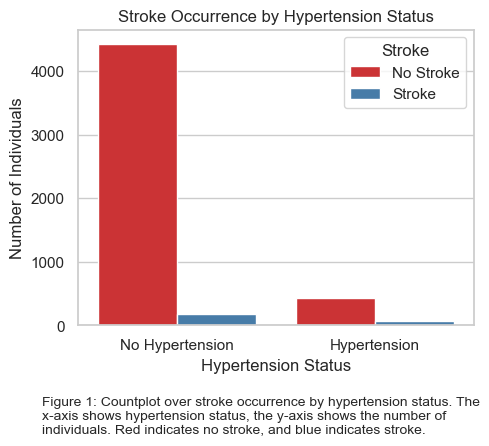

In [268]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(5, 4))

# Create a count plot for Hypertension with Stroke as hue
sns.countplot(
    data=stroke_df,
    x="hypertension",
    hue="stroke",
    palette="Set1"
)

# Add titles and labels
plt.title("Stroke Occurrence by Hypertension Status")
plt.xlabel("Hypertension Status")
plt.ylabel("Number of Individuals")

# Customize the legend
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])

# Customize x-axis labels
plt.xticks([0, 1], ["No Hypertension", "Hypertension"])

# Figure Label
plt.figtext(0.1, -0.1, "Figure 1: Countplot over stroke occurrence by hypertension status. The x-axis shows hypertension status, the y-axis shows the number of individuals. Red indicates no stroke, and blue indicates stroke.", wrap=True, horizontalalignment='left', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

We see in figure 1 that that the plot we have created is an unbalanced scale. The vast difference in the number of individuals between the "No Hypertension" and "Hypertension" categories makes it hard to discern any meaningful patterns. We attempt to normalize the data using percentages.

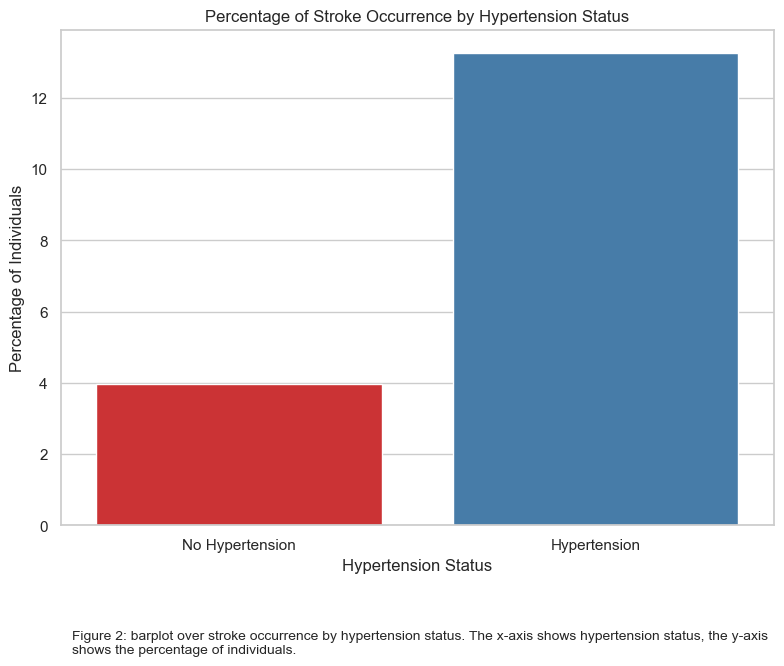

In [269]:
# Calculate the percentage of stroke occurrences within each hypertension status
percentage_df = (
    stroke_df.groupby("hypertension")["stroke"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
    .query("stroke == 1")
)

# Initialize the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a bar plot showing the percentage of stroke occurrences within each hypertension status
sns.barplot(
    data=percentage_df,
    x="hypertension",
    y="Percentage",
    palette= "Set1"
)

# Add titles and labels
plt.title('Percentage of Stroke Occurrence by Hypertension Status')
plt.xlabel('Hypertension Status')
plt.ylabel('Percentage of Individuals')

# Customize x-axis labels
plt.xticks([0, 1], ["No Hypertension", "Hypertension"])

# Figure Label
plt.figtext(0.1, -0.1, "Figure 2: barplot over stroke occurrence by hypertension status. The x-axis shows hypertension status, the y-axis shows the percentage of individuals.", wrap=True, horizontalalignment='left', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

### <a id="conclusion-from-data-visualization">3.2 Conclusion from Data Visualization</a>
In figure 2 we see that 4% of the people with no hypertension have had stroke while that number stands at 13% for people with hypertension, that is 3 times more. We can conclude that individuals with hypertension have a significantly higher percentage of strokes compared to those without hypertension. While most individuals in both groups do not experience strokes, the proportion of stroke occurrences is visibly higher among those with hypertension. This suggests that hypertension is a significant risk factor for stroke.